In [6]:
import HOD_code_new as HOD
import sys
import matplotlib.pyplot as plt
import numpy as np
import numba

# Parameters need for HOD 
argAll = {'hcat_dir': '/global/cscratch1/sd/arocher/data_cat/',
          'sim_name': 'MDPL2_z1.172.csv',
          'z_simu': 1.172,
          'rsd': True,
          'Om_M': 0.307115,
          'Om_L': 0.692885,
          'h0': 0.6777,
          'sigma_8': 0.807, 
          'boxsize': 1000,
          'nthreads': numba.get_num_threads(),
          'HOD_model': 'GHOD',
          'log_Mcent': 11.63,
          'Ac': 0.05,
          'sigma_M': 0.12,
          'As': 0.11,
          'alpha': 0.6,
          'gamma': 1,
          'M_0': 11.63,
          'M_1': 11.7,
          'Q': 100,
          'pmax': 0.1,
          'satellites': True,
          'mu_max': 1,
          'n_mu_bins': 101,
          'n_r_bins': 25,
          'n_rp_bins':25, 
          'rmin': 0.8,
          'rmax': 30,
          'rp_min': 0.03,
          'rp_max': 30,
          'bin_logscale' : True,
          'vel_sat' : 'rd_normal',
          'nb_ligne': 0,
          'use_shift' :'Y',
          'shift_M_0' : 0,
          'shift_M_1' :0.3,
          'path_to_NFW_draw': '/feynman/home/dphp/ar264273/scratch.ln/nfw.npy',
          'seed':42,
          'density': 1e-3, 
          'f_sigv': 1,
          'nb_real': 20,
          'path_to_lhspoint':'/global/homes/a/arocher/data_output/lhs/', 
          'fit_type': 'wp',
          'multipole_index': (0,2),
          'subsample_halos': False, 
          'use_particles': False, 
          'c_proxy': 0,
          'add_fsat': False,
          'fsat': 0.02,
          'conformity_bias': False, 
          'edges_rppi': None,
          'edges_smu': None,
          'los': 'z',
          'assembly_bias': 'env'}


argAll['H_0'] = 100
c = 299792.458  # light speed km*s^-1
argAll['Dh']  = c/argAll['H_0']      #Mpc/h
argAll['data_dir'] = str(sys.path[0])+"/"
argAll['Om_M'] = 0.315192
argAll['Om_L'] = 0.692885
argAll['h0'] = 0.6777
argAll['sim_name'] = "AbacusSummit_base_c000_ph000"
argAll['z_simu'] = 1.1





In [16]:
# Load halo catalog need to be a dict type
path_to_hcat = "../../scratch/hcat_1gpc_c000_ph000_(0,0,0).npy"
halo_cat = np.load(path_to_hcat, allow_pickle=True)[()]

#Halo catalog need to have these columns names ['row_id', "Mvir", "Rvir", "Rs", "x", "y","z", "vx", "vy", "vz", "Vrms"]
halo_cat.keys()

#Initialize HOD object with pre load halo_catalog
HOD_obj = HOD.HOD_parallel(argAll, hcat=halo_cat, mass_cut=None)

#Provide DESI fiducial cosmology or automatically set cosmology to the given Omega_M and sigma_8 input parameters in argAll 
from cosmoprimo.fiducial import DESI
cosmo = DESI(engine='class')
HOD_obj.cosmo = cosmo

WARNING COSMOLOGY SET WITH Om=0.315192 and sigma8 =0.807 FOR RESHIFT DISTANCE CONVERSION


In [17]:
#print halo catalog 
HOD_obj.hcat

{'x': array([2.9992360e-01, 1.1942745e-01, 9.4614461e-02, ..., 9.9962720e+02,
        9.9966962e+02, 9.9944513e+02], dtype=float32),
 'y': array([471.92624, 611.4984 , 611.68744, ..., 999.6114 , 999.38635,
        998.98157], dtype=float32),
 'z': array([ 34.3071 , 999.7398 , 999.4604 , ..., 833.73956, 833.86914,
        966.6535 ], dtype=float32),
 'vx': array([-179.74086 , -833.6455  , -641.8914  , ...,  126.51511 ,
         203.05748 ,   33.773464], dtype=float32),
 'vy': array([-331.4282 ,  966.97345, -671.24384, ...,   25.18138,  206.95482,
         124.68411], dtype=float32),
 'vz': array([ -351.14542 , -1263.4354  ,   392.67154 , ...,  -334.3336  ,
         -222.33948 ,    75.602936], dtype=float32),
 'Rs': array([56.45221 , 77.582054, 58.100243, ..., 57.55317 , 21.719337,
        35.187683], dtype=float32),
 'Rvir': array([127.903984, 189.21431 , 139.14464 , ..., 147.6236  ,  99.79649 ,
         97.09795 ], dtype=float32),
 'c': array([2.2657037, 2.4388928, 2.3949063, ..., 2.56

In [19]:
hcat = HOD_obj.downsample_mock_cat(HOD_obj.hcat, ds_fac=0.5)

In [9]:
# Get ngal and fsat from HOD input paramaters
HOD_obj.ngal

4.352664947509766


(2128768.1497705635, 0.530115054785813)

In [21]:
# Generate mock catalog
mock_cat = HOD_obj.make_mock_cat(fix_seed=None)

# Compute 2PCF and wp
rp, wp = HOD_obj.get_wp(mock_cat)
s, xi = HOD_obj.get_2PCF(mock_cat)


gen proba 0.5841004848480225
gen satellites  1.121605634689331
overall time  1.7192413806915283
number of central galaxies  549328
number of satellite galaxies  450614
satellite fraction  0.4506401371279534
#Computing wp...
#wp computed !time = 0.29271912574768066
#Computing 2PCF...
#2PCF computed !time = 0.2690238952636719


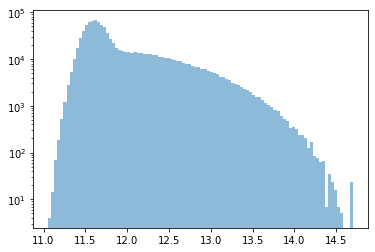

In [22]:
#Plot HMF
plt.hist(np.log10(mock_cat['Mvir']), bins=100, alpha=0.5)
plt.yscale('log')

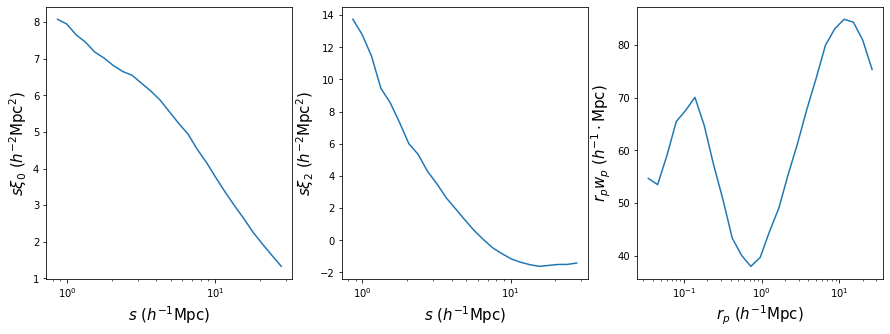

In [23]:
#Plot clustering
fig, axx = plt.subplots(1,3, figsize = (15, 5))

lax= axx.flatten()
ill = 0
for ax, xii_l in zip(axx[:2], xi):
    ax.plot(s, s*xii_l)
    ax.set_xlabel('$s$ ($h^{-1}$Mpc)', fontsize=15)
    ax.set_ylabel(f'$s \\xi_{{{ill}}}$ ($h^{{-2}}$Mpc$^2$)', fontsize=15)
    ax.set_xscale('log')
    ill+=2
        
ax = axx[-1]    
ax.plot(rp, rp*wp)
ax.set_xlabel('$r_p$ ($h^{-1}$Mpc)', fontsize=15)
ax.set_ylabel('$r_p w_p$ ($h^{-1}\cdot$Mpc)', fontsize=15)
ax.set_xscale('log')


In [15]:
HOD_obj.save_cat('halo_catalog_test.fits', HOD_obj.hcat)

Signature: HOD_obj.save_cat(fn, cat, **kwargs)
Docstring: --- Save to mock catalog to fits file
File:      ~/Code/pyHOD/HOD_code_new.py
Type:      method
